In [1]:
import pandas as pd
 
data = pd.read_csv('1995_2024.csv')
print(data)


                         time  latitude  longitude  depth    mag magType  nst  \
0    1999-12-31T18:47:17.140Z    52.868    159.979   53.9  5.280      mb  NaN   
1    1999-12-30T00:11:49.100Z    52.152    159.199   59.9  5.365      mb  NaN   
2    1999-12-01T16:59:22.830Z    54.512    162.490   33.0  4.855      mb  NaN   
3    1999-11-18T16:38:19.590Z    53.257    159.297   78.9  4.770      mb  NaN   
4    1999-11-13T21:24:45.980Z    52.513    160.062   38.6  5.400     mwc  NaN   
..                        ...       ...        ...    ...    ...     ...  ...   
694  1995-01-19T06:14:48.550Z    51.501    159.465   36.4  5.110      mb  NaN   
695  1995-01-18T19:38:22.390Z    50.957    156.437  137.4  5.025      mb  NaN   
696  1995-01-18T18:11:30.670Z    51.659    160.650   33.0  4.770      mb  NaN   
697  1995-01-12T09:51:06.530Z    53.571    159.083   33.0  4.855      mb  NaN   
698  1995-01-02T14:42:40.360Z    54.305    159.223  132.6  5.110      mb  NaN   

     gap  dmin   rms  ...  

In [2]:
data = data.drop([
 'depth',
 'magType',
 'nst',
 'gap',
 'dmin',
 'rms',
 'net',
 'id',
 'updated',
 'place',
 'type',
 'horizontalError',
 'depthError',
 'magError',
 'magNst',
 'status',
 'locationSource',
 'magSource'], axis=1)

In [3]:
[column for column in data]

['time', 'latitude', 'longitude', 'mag']

In [4]:
data.time

0      1999-12-31T18:47:17.140Z
1      1999-12-30T00:11:49.100Z
2      1999-12-01T16:59:22.830Z
3      1999-11-18T16:38:19.590Z
4      1999-11-13T21:24:45.980Z
                 ...           
694    1995-01-19T06:14:48.550Z
695    1995-01-18T19:38:22.390Z
696    1995-01-18T18:11:30.670Z
697    1995-01-12T09:51:06.530Z
698    1995-01-02T14:42:40.360Z
Name: time, Length: 699, dtype: object

In [5]:
new_time = []
for i in range(len(data.time)):
    new_time.append(data['time'][i].replace('T', ' ').replace('Z', ''))

In [6]:
data.time = [i for i in new_time]

In [7]:
import datetime
for i in range(len(data.time)):
    #data.time[i] = datetime.datetime.strptime(data.time[i], '%Y-%m-%d %H:%M:%S.%f')
    data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [8]:
def del_time(i, j):
    return (data.time[i] - data.time[j]).total_seconds()/3600/24/365
    

In [9]:
import haversine
from haversine import haversine
def dist(i, j):
    f1 = (data['latitude'][i], data['longitude'][i])
    f2 = (data['latitude'][j], data['longitude'][j])
    return haversine(f1, f2)

In [10]:
def f_bliz (t, R, M):
    #return R**2 * t * 10**(-1 * M)
    return ((R**2+(365*t)**2)**0.5)*10**(-0.3*M)

In [11]:
import numpy as np

f_bl = []
times = []
distance = []
lat = []
lon = []
mag = []
datetime = []
vremya = data.time
latitude=data.latitude
longitude=data.longitude
magnitude=data.mag

In [12]:
for i in range(1, len(data)):
    sosedi = []
    del_times = []
    del_distance = []

    for j in range(len(data)):
        if i != j and del_time(j, i) > 0:
            f_value = f_bliz(del_time(j, i), dist(i, j), data.mag[j])
            sosedi.append(f_value)
            del_times.append(del_time(j, i) * 10 ** (-0.5 * data.mag[j]))
            del_distance.append(dist(i, j) ** 2 * 10 ** (-0.5 * data.mag[j]))

    if sosedi:  # Проверка, что список не пуст
        min_sosedi = min(sosedi)
        f_bl.append(min_sosedi)
        times.append(del_times[sosedi.index(min_sosedi)])
        distance.append(del_distance[sosedi.index(min_sosedi)])
        lat.append(latitude[sosedi.index(min_sosedi)])
        lon.append(longitude[sosedi.index(min_sosedi)])
        mag.append(magnitude[sosedi.index(min_sosedi)])
        datetime.append(vremya[sosedi.index(min_sosedi)])
    else:
        # Можно добавить значение по умолчанию или пропустить
        print(f"Для i={i} не найдено подходящих соседей.")

In [13]:
import pandas as pd

df = pd.DataFrame({'distance': distance, 'times': times, 'f_bl': f_bl, 'lat': lat, 'lon': lon, 'mag': mag, 'datetime':datetime})
df

,distance,times,f_bl,lat,lon,mag,datetime
0,20.903926,0.000011,2.489940,52.868,159.979,5.280,1999-12-31 18:47:17.140
1,139.143508,0.000189,6.470552,52.868,159.979,5.280,1999-12-31 18:47:17.140
2,9.043839,0.000270,1.985555,52.868,159.979,5.280,1999-12-31 18:47:17.140
3,3.641355,0.000301,1.623996,52.868,159.979,5.280,1999-12-31 18:47:17.140
4,4.634143,0.000005,1.156291,52.513,160.062,5.400,1999-11-13 21:24:45.980
...,...,...,...,...,...,...,...
693,8.037050,0.000197,1.822186,52.264,159.043,6.000,1995-04-01 05:50:18.460
694,53.492232,0.000198,3.841122,52.264,159.043,6.000,1995-04-01 05:50:18.460
695,16.648152,0.000199,2.345549,52.264,159.043,6.000,1995-04-01 05:50:18.460
696,8.649391,0.000598,2.595874,53.315,159.625,4.770,1995-03-06 09:01:05.880


In [14]:
df.to_csv('bp1995-2024.csv')

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [16]:
data = pd.read_csv('bp1995-2024.csv')
print(data)

     Unnamed: 0    distance     times      f_bl     lat      lon    mag  \
0             0   20.903926  0.000011  2.489940  52.868  159.979  5.280   
1             1  139.143508  0.000189  6.470552  52.868  159.979  5.280   
2             2    9.043839  0.000270  1.985555  52.868  159.979  5.280   
3             3    3.641355  0.000301  1.623996  52.868  159.979  5.280   
4             4    4.634143  0.000005  1.156291  52.513  160.062  5.400   
..          ...         ...       ...       ...     ...      ...    ...   
693         693    8.037050  0.000197  1.822186  52.264  159.043  6.000   
694         694   53.492232  0.000198  3.841122  52.264  159.043  6.000   
695         695   16.648152  0.000199  2.345549  52.264  159.043  6.000   
696         696    8.649391  0.000598  2.595874  53.315  159.625  4.770   
697         697   25.205973  0.000100  2.891147  53.571  159.083  4.855   

                    datetime  
0    1999-12-31 18:47:17.140  
1    1999-12-31 18:47:17.140  
2    1

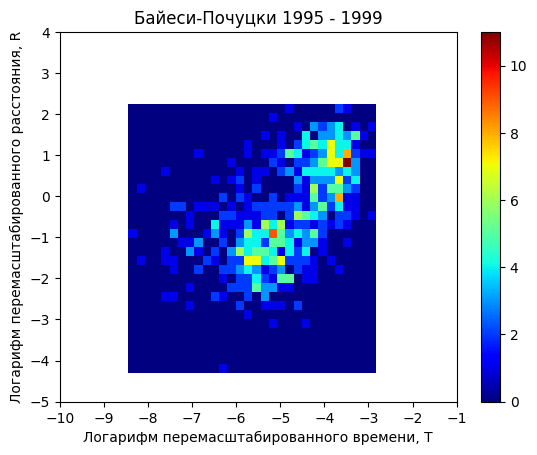

In [17]:
x = data.times
y = data.distance

plt.figure()
x_log = np.log10(x)
y_log = np.log10(y)
plt.hist2d(x_log, y_log, bins=30, cmap='jet')
plt.xscale('linear')
plt.yscale('linear')

plt.title('Байеси-Почуцки 1995 - 1999')
plt.xlabel('Логарифм перемасштабированного времени, T')
plt.ylabel('Логарифм перемасштабированного расстояния, R')
plt.colorbar()

plt.xlim(-10, -1)
plt.ylim(-5, 4)

#plt.axline((-0.2000140348882512, -4.712069036493148), slope = -0.885, color='black') #-0.890759x - 4.89023 = y
#диагональ
#k0 = -1.2
#b0 = -6

#toch0 = np.linspace(-12, 0, 10)  
#stright0 = [k0 * i + b0 for i in toch0]

#plt.plot(toch0, stright0, color='black')

#перпендикуляр
#k = 0.83
#b = 6

#toch = np.linspace(-12, 0, 10)  
#stright = [k * i + b for i in toch]

#plt.plot(toch, stright, color='black')
plt.show()

In [18]:
nn = []
R_list = []
T_list = []
for i in range(len(data)):
    R = np.log10(data.distance[i])
    T = np.log10(data.times[i])
    if (R >= (-1.2 * T - 6) and R >= (0.83 * T + 6)):
        nn.append(data.f_bl[i])
        R_list.append(R)
        T_list.append(T)

In [19]:
len(nn)

3

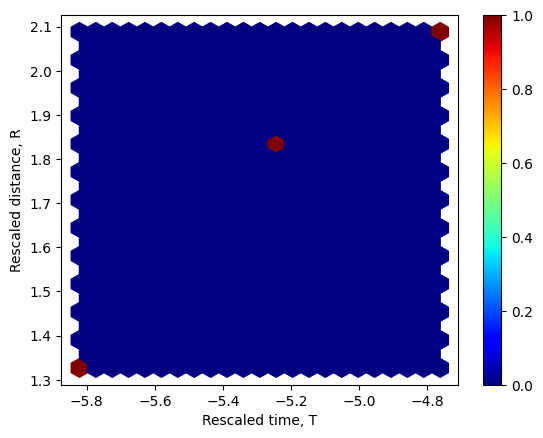

In [20]:
x = T_list
y = R_list

plt.figure()
plt.hexbin(x, y, gridsize=22, cmap='jet')
plt.xscale('linear')
plt.yscale('linear')

plt.xlabel('Rescaled time, T')
plt.ylabel('Rescaled distance, R')
plt.colorbar()

Text(0, 0.5, 'No. of events')

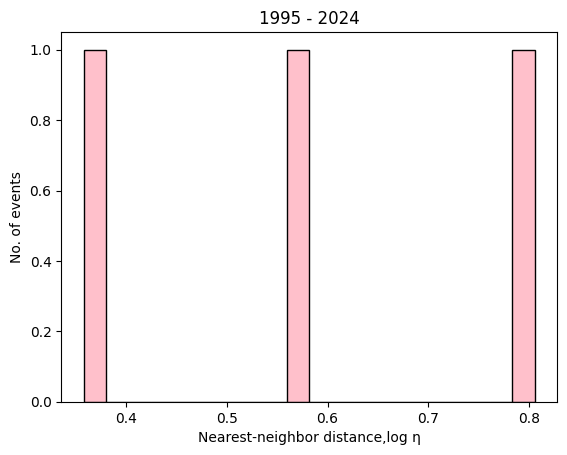

In [21]:
nn1 = [np.log10(i) for i in nn]
plt.hist(nn1, color = 'pink', edgecolor = 'black',
         bins = 20)
plt.title('1995 - 2024')
plt.xlabel('Nearest-neighbor distance,log η')
plt.ylabel('No. of events')

In [22]:
f_bl1 = [math.log(i, 10) for i in f_bl]

Text(0, 0.5, 'No. of events')

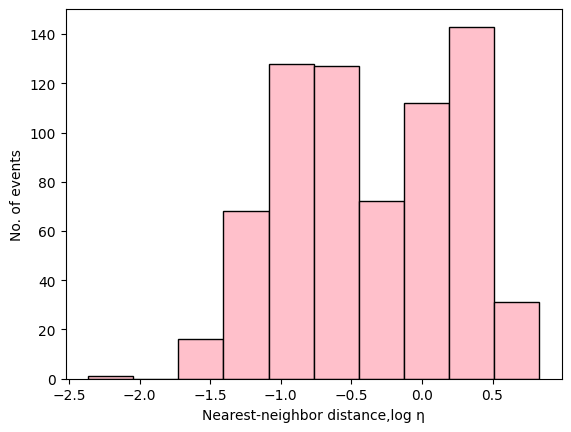

In [23]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(f_bl1, color = 'pink', edgecolor = 'black',
         bins = 10)
plt.xlabel('Nearest-neighbor distance,log η')
plt.ylabel('No. of events')